In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import os
import tensorflow as tf
#import gym
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
from sklearn.model_selection import train_test_split
sequence_length = 14

2024-03-10 13:17:17.466211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 13:17:19.239996: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Descargar los precios
tickers_with_dates = [
    ("AAPL", "2010-01-01", "2023-12-31"),
    ("MSFT", "2010-01-01", "2023-12-31"),
    ("AMZN", "2010-01-01", "2023-12-31"),
    ("GOOG", "2010-01-01", "2023-12-31"),
    ("TSLA", "2010-01-01", "2023-12-31"),
    ("META", "2010-01-01", "2023-12-31"),
    ("JNJ", "2010-01-01", "2023-12-31"),
    ("BAC", "2010-01-01", "2023-12-31"),
    ("JPM", "2010-01-01", "2023-12-31"),
    ("NVDA", "2010-01-01", "2023-12-31"),
    ("TSM", "2010-01-01", "2023-12-31"),
    ("BABA", "2010-01-01", "2023-12-31"),
    ("ADBE", "2010-01-01", "2023-12-31"),
    ("CRM", "2010-01-01", "2023-12-31"),
    ("WMT", "2010-01-01", "2023-12-31"),
    ("DIS", "2010-01-01", "2023-12-31"),
    ("KO", "2010-01-01", "2023-12-31"),
    ("PG", "2010-01-01", "2023-12-31"),
    ("VZ", "2010-01-01", "2023-12-31"),
    ("XOM", "2010-01-01", "2023-12-31"),
    ("CVX", "2010-01-01", "2023-12-31"),
    ("INTC", "2010-01-01", "2023-12-31"),
    ("PFE", "2010-01-01", "2023-12-31"),
    ("UNH", "2010-01-01", "2023-12-31"),
    ("COST", "2010-01-01", "2023-12-31"),
    ("HD", "2010-01-01", "2023-12-31"),
    ("MCD", "2010-01-01", "2023-12-31"),
    ("PEP", "2010-01-01", "2023-12-31"),
    ("MA", "2010-01-01", "2023-12-31")
]

datas = {}
for i in tickers_with_dates:

    try:
        # Attempt to download data for the ticker
        datas[i[0]] = yf.download(i[0], start=i[1], end=i[2], interval="1d")
    except yf.TickerNotFound:
        print(f"{i[0]}: Ticker not found")
    
    

# data = yf.download('AAPL', start='2005-9-29', end='2024-01-01', interval="1d")
# Imprimir data
#print(data.head())

# Obtener los precios de cierre y las fechas
# prices = data['Adj Close'].values
# dates = data.index.to_numpy()
# prices

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
# Función para calcular el RSI
def calculate_rsi(prices, n=30):
    deltas = np.diff(prices)
    seed = deltas[:n + 1]
    up = seed[seed >= 0].sum() / n
    down = -seed[seed < 0].sum() / n
    rs = up / down
    rsi = [np.nan] * (n - 1) + [100. - 100. / (1. + rs)]

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # Cambio actual
        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta
        up = (up * (n - 1) + upval) / n
        down = (down * (n - 1) + downval) / n
        rs = up / down
        rsi.append(100. - 100. / (1. + rs))

    return rsi

# Calcular el RSI
# rsi = calculate_rsi(prices,sequence_length)
#calcular Rsi de cada ticker
rsis={}
for k,v in datas.items():
    rsis[k] = calculate_rsi(v['Adj Close'].values, sequence_length)
    # prices = i['Adj Close'].values
    # dates = i.index.to_numpy()
    # rsis[k] = ()
rsis

{'AAPL': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  42.250916418235015,
  47.97518362215105,
  50.80804412777696,
  52.68352647752411,
  44.57884217997128,
  39.123398487676525,
  41.9487117526797,
  43.151234470829515,
  46.69747158861735,
  40.85063553849539,
  44.41041160915998,
  43.307463902502164,
  45.55690938482465,
  44.572452229442106,
  48.54549846280436,
  50.39020747520528,
  53.55693862555015,
  52.540446656446015,
  52.970238590959916,
  51.31099622894399,
  49.649453314537105,
  45.39422680660512,
  50.30823685930498,
  52.03832078018178,
  55.31444964993423,
  60.19772858631487,
  59.97154384066043,
  60.51915432233138,
  62.12333007229843,
  69.96966815868672,
  70.07502854185225,
  73.14875896515255,
  74.45406620200013,
  74.92999834520984,
  75.74122115146628,
  69.65116553891446,
  70.22113652531267,
  69.46120957038801,
  70.02230695361433,
  64.2640808565021,
  67.28228638104585,
  71.08048677482773,
  72.05779476

In [28]:
# Función para crear las secuencias de entrenamiento
def create_dataset(data_price, sequence_length, data_rsi=None):
    X = []
    label = []
    for i in range(len(data_price) - sequence_length):
        #sequence = [[price, rsi_] for price, rsi_ in zip(data_price[i:i + sequence_length], data_rsi[i:i + sequence_length])] # ejemplo con mas de 1 variable
        sequence = [[price] for price in data_price[i:i + sequence_length]] # se pueden agregar más variables
        label.append(data_rsi[i + sequence_length])
        # print(label)
        X.append(sequence)
    return np.array(X), np.array(label)



In [7]:
def prepare_dataset(prices,rsi):
    # Normalizar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_prices = scaler.fit_transform(prices.reshape(-1, 1))
    normalized_rsi = scaler.fit_transform(np.array(rsi).reshape(-1,1))
    # Crear las secuencias de entrenamiento

    X, y = create_dataset(normalized_prices.reshape(-1), sequence_length, normalized_rsi.reshape(-1))    
    
    X_train = X[: 8*(len(X))//10]
    y_train = y[: 8*(len(X))//10]

    X_val= X[8*(len(X))//10 :]
    y_val = y[8*(len(X))//10 :]
    
    # X_test = X[7*(len(X))//10 : 9*(len(X))//10]
    # y_test = y[7*(len(X))//10 : 9*(len(X))//10]
    # 
    # X_val = X[9*(len(X))//10 :]
    # y_val = y[9*(len(X))//10 :]
    
    return X_train, X_val,  y_train, y_val

X_train, X_val, y_train, y_val = prepare_dataset(datas['AAPL']['Adj Close'].values,rsis['AAPL'])
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2806, 14, 1), (702, 14, 1), (2806,), (702,))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model


In [10]:

# Construir el modelo LSTM para predecir el RSI
model = Sequential()

model.add(InputLayer(shape=(sequence_length,1)))
model.add(LSTM(50))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Capa con función de activación 'sigmoid' ya que es una funcion de activacion que calcula la probabilidad de ser de x tipo, y como al igual que el RSI va de 0 a 100, se aprovecha este particular para usarla.
model.summary()


2024-03-10 13:18:22.432578: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-10 13:18:22.433485: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2708, 14, 1) (678, 14, 1) (2708,) (678,)
(2327, 14, 1) (582, 14, 1) (2327,) (582,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(1857, 14, 1) (465, 14, 1) (1857,) (465,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,) (702,)
(2806, 14, 1) (702, 14, 1) (2806,)

In [371]:
for k,v in datas.items():
    X_train, X_val, y_train, y_val = prepare_dataset(datas[k]['Adj Close'].values,rsis[k])
    print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

    cp_name = f'./model_{sequence_length}_periods.keras'
    cp = ModelCheckpoint(cp_name, save_best_only=True, monitor='val_loss')
    # early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    
    model.compile(loss=MeanSquaredError(), optimizer= Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])  # Cambiar a 'mean_absolute_error'
    
    # Entrenar el modelo para predecir el RSI
    model.fit(X_train, y_train, validation_data = (X_val, y_val) ,epochs=150, batch_size=30, callbacks=[cp])


(2806, 14, 1) (702, 14, 1) (2806,) (702,)
Epoch 1/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0361 - root_mean_squared_error: 0.1900 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1834
Epoch 2/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0371 - root_mean_squared_error: 0.1926 - val_loss: 0.0350 - val_root_mean_squared_error: 0.1889
Epoch 3/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0368 - root_mean_squared_error: 0.1918 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1837
Epoch 4/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0355 - root_mean_squared_error: 0.1884 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1896
Epoch 5/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0374 - root_mean_squared_error: 0.1932 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1939
Epoch 6/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0374 - root_mean_squared_error: 0.1933 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1665
Epoch 7/150
94/

In [67]:
model = load_model('./model_14_periods_save.keras')
# Realizar las predicciones del RSI
scaler = MinMaxScaler(feature_range=(0, 1))
test_data = yf.download('MMM', start="2000-01-01", end="2023-12-31")
dates = test_data.index.to_numpy()
prices = (np.array(test_data['Adj Close'].values))
rsi = np.array(calculate_rsi(prices))
prices = scaler.fit_transform(prices.reshape(-1,1))
rsi_norm = scaler.fit_transform(rsi.reshape(-1,1))
test_data = create_dataset(prices,14,rsi)

all_predictions = model.predict(test_data)
print(all_predictions.min())
# Desnormalizar las predicciones del RSI para obtener los valores reales
all_predictions = scaler.inverse_transform(all_predictions)

rsi_norm=rsi_norm.reshape(-1)
# Imprimir los valores RSI predichos para todo el período
predicted_rsi = pd.Series(np.array(rsi[sequence_length:]), index=dates[sequence_length:])
predicted_rsi['Predicted_RSI'] = all_predictions.flatten()
#print(predicted_rsi)

# Imprimir los valores del RSI original y del RSI predicho con un bucle for
for date, rsi_value, predicted_rsi_value in zip(predicted_rsi.index, predicted_rsi, predicted_rsi['Predicted_RSI']):
    print(f"{date}: RSI={rsi_value:.2f}, Predicted_RSI={predicted_rsi_value:.2f}")

# Crear una lista con los valores predichos del RSI
predicted_rsi_values = np.array(predicted_rsi['Predicted_RSI'])

# Imprimir la lista de valores predichos del RSI
#print(predicted_rsi_values)

[*********************100%%**********************]  1 of 1 completed


189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.0022844253
2000-01-24 00:00:00: RSI=nan, Predicted_RSI=45.66
2000-01-25 00:00:00: RSI=nan, Predicted_RSI=42.23
2000-01-26 00:00:00: RSI=nan, Predicted_RSI=41.26
2000-01-27 00:00:00: RSI=nan, Predicted_RSI=43.77
2000-01-28 00:00:00: RSI=nan, Predicted_RSI=42.54
2000-01-31 00:00:00: RSI=nan, Predicted_RSI=39.78
2000-02-01 00:00:00: RSI=nan, Predicted_RSI=47.41
2000-02-02 00:00:00: RSI=nan, Predicted_RSI=37.25
2000-02-03 00:00:00: RSI=nan, Predicted_RSI=39.88
2000-02-04 00:00:00: RSI=nan, Predicted_RSI=45.82
2000-02-07 00:00:00: RSI=nan, Predicted_RSI=30.61
2000-02-08 00:00:00: RSI=nan, Predicted_RSI=58.75
2000-02-09 00:00:00: RSI=nan, Predicted_RSI=28.84
2000-02-10 00:00:00: RSI=nan, Predicted_RSI=30.94
2000-02-11 00:00:00: RSI=nan, Predicted_RSI=30.20
2000-02-14 00:00:00: RSI=44.98, Predicted_RSI=35.87
2000-02-15 00:00:00: RSI=50.30, Predicted_RSI=40.54
2000-02-16 00:00:00: RSI=49.66, Predicted_RSI=60.51
2000-02-17 00:00:00: RSI=50.71, Predicte

In [48]:
all_predictions

array([[52.5376  ],
       [47.262836],
       [42.917843],
       ...,
       [63.681984],
       [63.893295],
       [66.595535]], dtype=float32)

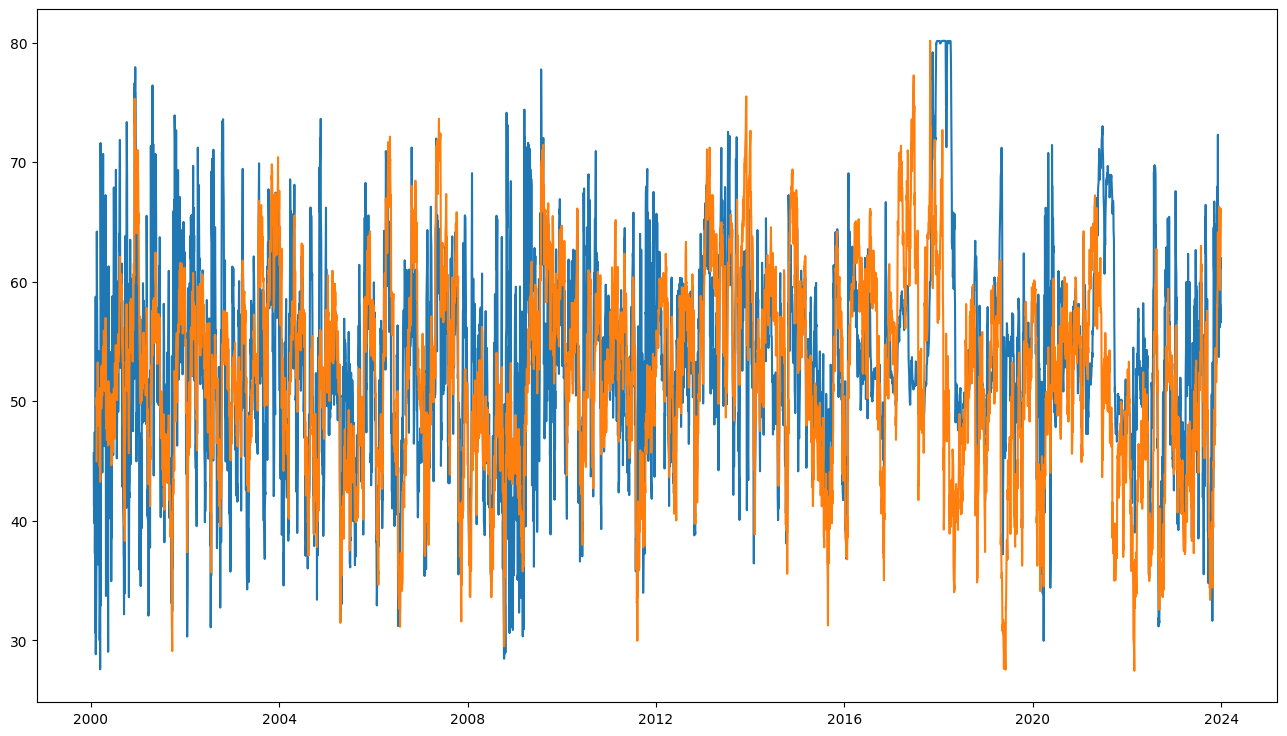

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.plot(dates.astype('datetime64[ns]')[14:],all_predictions)
plt.plot(dates.astype('datetime64[ns]')[14:],rsi[13:-1])
plt.show()


In [396]:
predicted_rsi

2005-10-19 00:00:00                                            49.540847
2005-10-20 00:00:00                                             45.01842
2005-10-21 00:00:00                                            66.798269
2005-10-24 00:00:00                                            69.863456
2005-10-25 00:00:00                                            68.509004
                                             ...                        
2023-12-26 00:00:00                                            65.115855
2023-12-27 00:00:00                                               60.916
2023-12-28 00:00:00                                            60.429335
2023-12-29 00:00:00                                            59.313041
Predicted_RSI          [52.283028, 52.263996, 53.042385, 56.696423, 5...
Length: 4581, dtype: object

In [ ]:
#predicted_rsi_values

In [149]:
# Calcular las métricas para las predicciones del modelo LSTM
capital_inicial = 100000
costo_inversion = 5000


# Inicializar variables y listas para el análisis de rendimiento
capital_actual = capital_inicial
posiciones = []
rendimientos = []

# Recorrer todas las fechas para realizar las operaciones de compra y venta
for i in range(sequence_length,len(dates) - sequence_length):
    date = dates[i]
    print(len(dates))
    rsi_value = predicted_rsi_values[i]

    if rsi_value < 40:
        signal = 'Compra'
    elif rsi_value > 65:
        signal = 'Venta'
    else:
        signal = 'Neutral'

    if signal == 'Compra':
        # Calcula la cantidad de acciones que puedes comprar con el costo de inversión fijo
        cantidad_acciones = int(costo_inversion / prices2[i])
        # Resta el costo de la inversión del capital disponible
        capital_actual -= costo_inversion
        # Agrega la posición a la lista de posiciones con el precio de compra
        posiciones.append({'Fecha': date, 'Cantidad': cantidad_acciones, 'Precio de compra': prices2[i]})

    elif signal == 'Venta':
        for posicion in posiciones:
            cantidad_acciones = posicion['Cantidad']
            precio_compra = posicion['Precio de compra']
            precio_venta = prices2[i]
            rentabilidad = (precio_venta - precio_compra) / precio_compra
            rendimientos.append(rentabilidad)

            capital_actual += cantidad_acciones * precio_venta

        posiciones = []

# Calcula el rendimiento acumulado
rendimiento_acumulado = (capital_actual - capital_inicial) / capital_inicial

# Calcula la rentabilidad total considerando todas las operaciones realizadas
rentabilidad_total = np.prod(1 + np.array(rendimientos))

# Imprime la rentabilidad total después de vender todas las acciones compradas
print("Rentabilidad total después de vender todas las acciones compradas:", rentabilidad_total)

# Imprime las métricas adicionales según lo que necesites
print("Métricas:")
print("Rendimiento acumulado:", rendimiento_acumulado)

# Número total de operaciones realizadas (compras y ventas)
num_operaciones = len(rendimientos)
print("Número total de operaciones:", num_operaciones)

# Número de operaciones ganadoras y perdedoras
num_operaciones_ganadoras = len([rendimiento for rendimiento in rendimientos if rendimiento >= 0])
num_operaciones_perdedoras = len([rendimiento for rendimiento in rendimientos if rendimiento < 0])
print("Número de operaciones ganadoras:", num_operaciones_ganadoras)
print("Número de operaciones perdedoras:", num_operaciones_perdedoras)

# Rendimiento promedio de operaciones ganadoras y perdedoras
rendimiento_promedio_ganadoras = np.mean([rendimiento for rendimiento in rendimientos if rendimiento >= 0])
rendimiento_promedio_perdedoras = np.mean([rendimiento for rendimiento in rendimientos if rendimiento < 0])
print("Rendimiento promedio de operaciones ganadoras:", rendimiento_promedio_ganadoras)
print("Rendimiento promedio de operaciones perdedoras:", rendimiento_promedio_perdedoras)

2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931
2931


IndexError: index 1983 is out of bounds for axis 0 with size 1983